# Evaluation
The aim of the notebook is to compare what a NLP tool does when compared with manually annotated data.

In [ ]:
import pandas as pd

import numpy as np
import requests
import json

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://nlp.fi.muni.cz/~xpopelk/maj.txt

--2020-12-10 13:13:45--  https://nlp.fi.muni.cz/~xpopelk/maj.txt
Resolving nlp.fi.muni.cz (nlp.fi.muni.cz)... 147.251.51.11
Connecting to nlp.fi.muni.cz (nlp.fi.muni.cz)|147.251.51.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29777 (29K) [text/plain]
Saving to: ‘maj.txt’

maj.txt             100%[===================>]  29.08K  --.-KB/s    in 0.1s    

2020-12-10 13:13:45 (266 KB/s) - ‘maj.txt’ saved [29777/29777]



In [ ]:
text = None
with open('maj.txt') as f:  # modify the path if needed
    text = f.read()

# Deal only with part of the data
The poem is segmented into stanzas. In text, we recognize stanzas thanks to double enters (\n\n).

In [ ]:
segments = text.split('\n\n')
segments[:3]

['',
 '1',
 'Byl pozdní večer – první máj –\nvečerní máj – byl lásky čas.\nHrdliččin zval ku lásce hlas,\nkde borový zaváněl háj.\nO lásce šeptal tichý mech;\nkvětoucí strom lhal lásky žel,\nsvou lásku slavík růži pěl,\nrůžinu jevil vonný vzdech.\nJezero hladké v křovích stinných\nzvučelo temně tajný bol,\nbřeh je objímal kol a kol;\na slunce jasná světů jiných\nbloudila blankytnými pásky,\nplanoucí tam co slzy lásky.']

The first stanza is in segment n. 2 (counting starts at 0).

In [ ]:
data = {"call": "tagger",
        "lang": "cs",
        "output": "json",
        "text": segments[2].replace(';', ',')
       }
uri = "https://nlp.fi.muni.cz/languageservices/service.py"
r = requests.post(uri, data=data)
r

<Response [200]>

In [ ]:
if r.status_code!=200:
    print(r.content)

In [ ]:
data = r.json()
data

{'vertical': [['<s>'],
  ['Byl', 'být', 'k5eAaImAgInS'],
  ['pozdní', 'pozdní', 'k2eAgInSc1d1'],
  ['večer', 'večer', 'k1gInSc1'],
  ['–', '–', 'k?'],
  ['první', 'první', 'k4xOgInSc4'],
  ['máj', 'máj', 'k1gInSc4'],
  ['–', '–', 'k?'],
  ['večerní', 'večerní', 'k2eAgInSc4d1'],
  ['máj', 'máj', 'k1gFnSc1'],
  ['–', '–', 'k?'],
  ['byl', 'být', 'k5eAaImAgInS'],
  ['lásky', 'láska', 'k1gFnSc2'],
  ['čas', 'čas', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['Hrdliččin', 'hrdliččin', 'k2eAgInSc1d1'],
  ['zval', 'zvát', 'k5eAaImAgInS'],
  ['ku', 'k', 'k7c3'],
  ['lásce', 'láska', 'k1gFnSc3'],
  ['hlas', 'hlas', 'k1gInSc1'],
  ['<g/>'],
  [',', ',', 'kIx,'],
  ['kde', 'kde', 'k6eAd1'],
  ['borový', 'borový', 'k2eAgMnSc1d1'],
  ['zaváněl', 'zavánět', 'k5eAaImAgInS'],
  ['háj', 'háj', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['O', 'o', 'k7c6'],
  ['lásce', 'láska', 'k1gFnSc6'],
  ['šeptal', 'šeptat', 'k5eAaImAgInS

In [ ]:
tokens = [token for token in data['vertical'] if len(token)==3]
df = pd.DataFrame.from_dict({"word": [word for word, lemma, tag in tokens],
                              "lemma": [lemma for word, lemma, tag in tokens],
                              "tag": [tag for word, lemma, tag in tokens]
                               })
pd.options.display.max_rows = len(df)
df

,word,lemma,tag
0,Byl,být,k5eAaImAgInS
1,pozdní,pozdní,k2eAgInSc1d1
2,večer,večer,k1gInSc1
3,–,–,k?
4,první,první,k4xOgInSc4
5,máj,máj,k1gInSc4
6,–,–,k?
7,večerní,večerní,k2eAgInSc4d1
8,máj,máj,k1gFnSc1
9,–,–,k?


In [ ]:
df['pos'] = df['tag'].str[:2]
df

,word,lemma,tag,pos
0,Byl,být,k5eAaImAgInS,k5
1,pozdní,pozdní,k2eAgInSc1d1,k2
2,večer,večer,k1gInSc1,k1
3,–,–,k?,k?
4,první,první,k4xOgInSc4,k4
5,máj,máj,k1gInSc4,k1
6,–,–,k?,k?
7,večerní,večerní,k2eAgInSc4d1,k2
8,máj,máj,k1gFnSc1,k1
9,–,–,k?,k?


In [ ]:
annotations = [(k, '') for k in df['word'].values]
annotations

[('Byl', ''),
 ('pozdní', ''),
 ('večer', ''),
 ('–', ''),
 ('první', ''),
 ('máj', ''),
 ('–', ''),
 ('večerní', ''),
 ('máj', ''),
 ('–', ''),
 ('byl', ''),
 ('lásky', ''),
 ('čas', ''),
 ('.', ''),
 ('Hrdliččin', ''),
 ('zval', ''),
 ('ku', ''),
 ('lásce', ''),
 ('hlas', ''),
 (',', ''),
 ('kde', ''),
 ('borový', ''),
 ('zaváněl', ''),
 ('háj', ''),
 ('.', ''),
 ('O', ''),
 ('lásce', ''),
 ('šeptal', ''),
 ('tichý', ''),
 ('mech', ''),
 (',', ''),
 ('květoucí', ''),
 ('strom', ''),
 ('lhal', ''),
 ('lásky', ''),
 ('žel', ''),
 (',', ''),
 ('svou', ''),
 ('lásku', ''),
 ('slavík', ''),
 ('růži', ''),
 ('pěl', ''),
 (',', ''),
 ('růžinu', ''),
 ('jevil', ''),
 ('vonný', ''),
 ('vzdech', ''),
 ('.', ''),
 ('Jezero', ''),
 ('hladké', ''),
 ('v', ''),
 ('křovích', ''),
 ('stinných', ''),
 ('zvučelo', ''),
 ('temně', ''),
 ('tajný', ''),
 ('bol', ''),
 (',', ''),
 ('břeh', ''),
 ('je', ''),
 ('objímal', ''),
 ('kol', ''),
 ('a', ''),
 ('kol', ''),
 (',', ''),
 ('a', ''),
 ('slunce', ''),


In [ ]:
df[df.pos=='k3']

,word,lemma,tag,pos
37,svou,svůj,k3xOyFgFnSc4,k3
59,je,on,k3xPp3gMnPc4,k3


# Manual annotation
Copy the previous output in a new variable. Fill the empty values by the following codes for part-of-speech:
* kI - punctuation
* k1 - noun
* k2 - adjective
* k3 - pronoun
* k4 - numeral
* k5 - verb
* k6 - adverb
* k7 - preposition
* k8 - conjunction
* k9 - particle
* k0 - interjection
* k? - unknown

In [ ]:
annotations = [('Byl', 'k5'),
 ('pozdní', 'k2'),
 ('večer', 'k1'),
 ('–', 'kI'),
 ('první', 'k2'),
 ('máj', 'k1'),
 ('–', 'kI'),
 ('večerní', 'k2'),
 ('máj', 'k1'),
 ('–', 'kI'),
 ('byl', 'k5'),
 ('lásky', 'k1'),
 ('čas', 'k1'),
 ('.', 'kI'),
 ('Hrdliččin', 'k2'),
 ('zval', 'k5'),
 ('ku', 'k7'),
 ('lásce', 'k1'),
 ('hlas', 'k1'),
 (',', 'kI'),
 ('kde', 'k8'),
 ('borový', 'k2'),
 ('zaváněl', 'k5'),
 ('háj', 'k1'),
 ('.', 'kI'),
 ('O', 'k7'),
 ('lásce', 'k1'),
 ('šeptal', 'k5'),
 ('tichý', 'k2'),
 ('mech', 'k1'),
 (',', 'kI'),
 ('květoucí', 'k2'),
 ('strom', 'k1'),
 ('lhal', 'k5'),
 ('lásky', 'k1'),
 ('žel', 'k1'),
 (',', 'kI'),
 ('svou', 'k3'),
 ('lásku', 'k1'),
 ('slavík', 'k1'),
 ('růži', 'k1'),
 ('pěl', 'k5'),
 (',', 'kI'),
 ('růžinu', 'k2'),
 ('jevil', 'k5'),
 ('vonný', 'k2'),
 ('vzdech', 'k1'),
 ('.', 'kI'),
 ('Jezero', 'k1'),
 ('hladké', 'k2'),
 ('v', 'k7'),
 ('křovích', 'k1'),
 ('stinných', 'k2'),
 ('zvučelo', 'k5'),
 ('temně', 'k6'),
 ('tajný', 'k2'),
 ('bol', 'k1'),
 (',', 'kI'),
 ('břeh', 'k1'),
 ('je', 'k3'),
 ('objímal', 'k5'),
 ('kol', 'k6'),
 ('a', 'k8'),
 ('kol', 'k6'),
 (',', 'kI'),
 ('a', 'k8'),
 ('slunce', 'k1'),
 ('jasná', 'k2'),
 ('světů', 'k1'),
 ('jiných', 'k2'),
 ('bloudila', 'k5'),
 ('blankytnými', 'k2'),
 ('pásky', 'k1'),
 (',', 'kI'),
 ('planoucí', 'k2'),
 ('tam', 'k6'),
 ('co', 'k8'),
 ('slzy', 'k1'),
 ('lásky', 'k1'),
 ('.', 'kI')]

In [ ]:
labels = sorted(set(df.pos.values))
labels

['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k?', 'kI']

In [ ]:
annotations

[('Byl', 'k5'),
 ('pozdní', 'k2'),
 ('večer', 'k1'),
 ('–', 'kI'),
 ('první', 'k2'),
 ('máj', 'k1'),
 ('–', 'kI'),
 ('večerní', 'k2'),
 ('máj', 'k1'),
 ('–', 'kI'),
 ('byl', 'k5'),
 ('lásky', 'k1'),
 ('čas', 'k1'),
 ('.', 'kI'),
 ('Hrdliččin', 'k2'),
 ('zval', 'k5'),
 ('ku', 'k7'),
 ('lásce', 'k1'),
 ('hlas', 'k1'),
 (',', 'kI'),
 ('kde', 'k8'),
 ('borový', 'k2'),
 ('zaváněl', 'k5'),
 ('háj', 'k1'),
 ('.', 'kI'),
 ('O', 'k7'),
 ('lásce', 'k1'),
 ('šeptal', 'k5'),
 ('tichý', 'k2'),
 ('mech', 'k1'),
 (',', 'kI'),
 ('květoucí', 'k2'),
 ('strom', 'k1'),
 ('lhal', 'k5'),
 ('lásky', 'k1'),
 ('žel', 'k1'),
 (',', 'kI'),
 ('svou', 'k3'),
 ('lásku', 'k1'),
 ('slavík', 'k1'),
 ('růži', 'k1'),
 ('pěl', 'k5'),
 (',', 'kI'),
 ('růžinu', 'k2'),
 ('jevil', 'k5'),
 ('vonný', 'k2'),
 ('vzdech', 'k1'),
 ('.', 'kI'),
 ('Jezero', 'k1'),
 ('hladké', 'k2'),
 ('v', 'k7'),
 ('křovích', 'k1'),
 ('stinných', 'k2'),
 ('zvučelo', 'k5'),
 ('temně', 'k6'),
 ('tajný', 'k2'),
 ('bol', 'k1'),
 (',', 'kI'),
 ('břeh', '

In [ ]:
#confusion_matrix_ = confusion_matrix([v for k,v in annotations], df.pos, labels=labels, normalize='all')
confusion_matrix_ = confusion_matrix([v for k,v in annotations], df.pos, labels=labels)

In [ ]:
confusion_matrix_

array([[25,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 2, 13,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 11]])

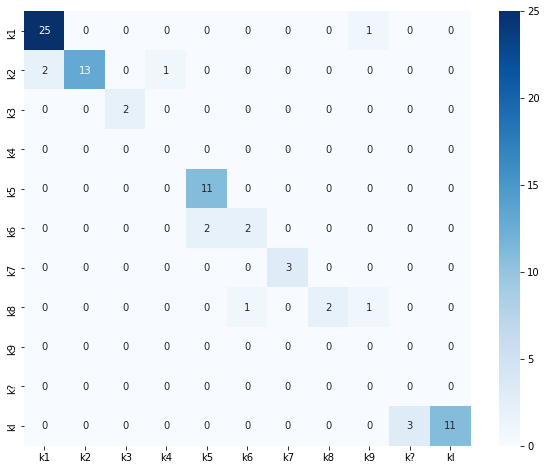

In [ ]:
cm = pd.DataFrame(confusion_matrix_, index = labels, columns= labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
table = precision_recall_fscore_support([v for k,v in annotations], df.pos)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
table

(array([0.92592593, 1.        , 1.        , 0.        , 0.84615385,
        0.66666667, 1.        , 1.        , 0.        , 0.        ,
        1.        ]),
 array([0.96153846, 0.8125    , 1.        , 0.        , 1.        ,
        0.5       , 1.        , 0.5       , 0.        , 0.        ,
        0.78571429]),
 array([0.94339623, 0.89655172, 1.        , 0.        , 0.91666667,
        0.57142857, 1.        , 0.66666667, 0.        , 0.        ,
        0.88      ]),
 array([26, 16,  2,  0, 11,  4,  3,  4,  0,  0, 14]))